In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 32 × Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, haswell)
Threads: 1 default, 0 interactive, 1 GC (on 32 virtual cores)
Environment:
  JULIA_PKG_SERVER = https://mirrors.tuna.tsinghua.edu.cn/julia


In [142]:
# set the output format of gr backend to png. default is svg, which maldisplays in jupyter pages (after restart).
# StatsPlots has an identical gr() function.
@time using Plots;
#gr(fmt = "png")
@time gr(fmt = :png)

@time using StatsPlots; 
@time gr(fmt = :png)

  0.001150 seconds (140 allocations: 13.141 KiB)
  0.000063 seconds (5 allocations: 576 bytes)
  0.221377 seconds (152.65 k allocations: 8.982 MiB)
  0.000051 seconds (5 allocations: 576 bytes)


Plots.GRBackend()

In [3]:
using Distributions
using StatsBase
using KernelDensity

using StatisticalRethinking

# setting default attributes for plots
default(labels=false)

# Code 3.1

In [4]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

# Code 3.2

In [5]:
function construct_posterior_and_sampling(no_of_tosses::Int32, no_of_ups::Int32, samples_count::Int64=10_000)
    size = 1000
    @show p_grid = range(0, 1; length=size)
    # flat prior
    prob_p = repeat([1.0], size);
    # likelihood (conditional probability) of seeing 6 up in 9 tossings given p
    prob_data = [pdf(Binomial(no_of_tosses, p), no_of_ups) for p in p_grid];
    posterior = prob_data .* prob_p
    posterior /= sum(posterior)

    cat = Categorical(posterior);
    samples = p_grid[rand(cat, samples_count)];
    return (p_grid, posterior, samples)
end

construct_posterior_and_sampling (generic function with 2 methods)

In [6]:
#=
size = 1000
@show p_grid = range(0, 1; length=size)
prob_p = repeat([1.0], size);
prob_data = [pdf(Binomial(9, p), 6) for p in p_grid];
posterior = prob_data .* prob_p
posterior /= sum(posterior);
=#

p_grid, posterior, samples = construct_posterior_and_sampling(Int32(9), Int32(6))

p_grid = range(0, 1; length = size) = 0.0:0.001001001001001001:1.0


(0.0:0.001001001001001001:1.0, [0.0, 8.433658816529999e-19, 5.381332819661481e-17, 6.111248552252767e-16, 3.4233680569896395e-15, 1.301977811569362e-14, 3.875963258549832e-14, 9.744233005994771e-14, 2.1646380549927197e-13, 4.375070384958201e-13  …  5.823218682379397e-7, 4.114682141668325e-7, 2.7732470313529436e-7, 1.7570076237332623e-7, 1.022946034670045e-7, 5.269177907528289e-8, 2.2363727846061364e-8, 6.6663074687178874e-9, 8.383158000066749e-10, 0.0], [0.8108108108108109, 0.5685685685685685, 0.5515515515515516, 0.6616616616616616, 0.5695695695695696, 0.7267267267267268, 0.5285285285285285, 0.5645645645645646, 0.7537537537537538, 0.6116116116116116  …  0.4744744744744745, 0.6856856856856857, 0.6126126126126126, 0.6056056056056056, 0.6866866866866866, 0.5375375375375375, 0.2722722722722723, 0.5565565565565566, 0.7917917917917918, 0.7137137137137137])

In [7]:
posterior

1000-element Vector{Float64}:
 0.0
 8.433658816529999e-19
 5.381332819661481e-17
 6.111248552252767e-16
 3.4233680569896395e-15
 1.301977811569362e-14
 3.875963258549832e-14
 9.744233005994771e-14
 2.1646380549927197e-13
 4.375070384958201e-13
 8.207545114340039e-13
 1.4496105748714254e-12
 2.4359217775302152e-12
 ⋮
 1.050374395955915e-6
 7.939664540200766e-7
 5.823218682379397e-7
 4.114682141668325e-7
 2.7732470313529436e-7
 1.7570076237332623e-7
 1.022946034670045e-7
 5.269177907528289e-8
 2.2363727846061364e-8
 6.6663074687178874e-9
 8.383158000066749e-10
 0.0

In [8]:
sum(posterior)

0.9999999999999999

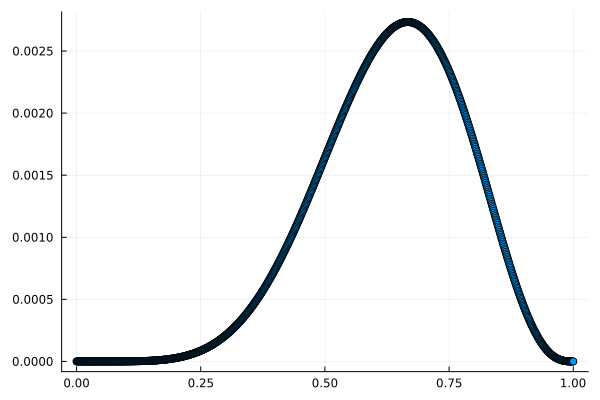

In [9]:
scatter(p_grid, posterior)

In [10]:
sum(posterior)

0.9999999999999999

# Code 3.3

In [11]:
?cat

search: cat catch Categorical catch_backtrace vcat hcat scatter scatter!



```
cat(A...; dims)
```

Concatenate the input arrays along the dimensions specified in `dims`.

Along a dimension `d in dims`, the size of the output array is `sum(size(a,d) for a in A)`. Along other dimensions, all input arrays should have the same size, which will also be the size of the output array along those dimensions.

If `dims` is a single number, the different arrays are tightly packed along that dimension. If `dims` is an iterable containing several dimensions, the positions along these dimensions are increased simultaneously for each input array, filling with zero elsewhere. This allows one to construct block-diagonal matrices as `cat(matrices...; dims=(1,2))`, and their higher-dimensional analogues.

The special case `dims=1` is [`vcat`](@ref), and `dims=2` is [`hcat`](@ref). See also [`hvcat`](@ref), [`hvncat`](@ref), [`stack`](@ref), [`repeat`](@ref).

The keyword also accepts `Val(dims)`.

!!! compat "Julia 1.8"
    For multiple dimensions `dims = Val(::Tuple)` was added in Julia 1.8.


# Examples

```jldoctest
julia> cat([1 2; 3 4], [pi, pi], fill(10, 2,3,1); dims=2)  # same as hcat
2×6×1 Array{Float64, 3}:
[:, :, 1] =
 1.0  2.0  3.14159  10.0  10.0  10.0
 3.0  4.0  3.14159  10.0  10.0  10.0

julia> cat(true, trues(2,2), trues(4)', dims=(1,2))  # block-diagonal
4×7 Matrix{Bool}:
 1  0  0  0  0  0  0
 0  1  1  0  0  0  0
 0  1  1  0  0  0  0
 0  0  0  1  1  1  1

julia> cat(1, [2], [3;;]; dims=Val(2))
1×3 Matrix{Int64}:
 1  2  3
```


In [12]:
?rand

search: rand randn transcode @shorthands ZeroMeanDiagNormal



```
rand([rng=default_rng()], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and dense `BitSet`s. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


In [74]:
samples_count = 10_000
cat_var = Categorical(posterior);
indices = rand(cat_var, samples_count)
samples = p_grid[indices];

In [75]:
indices

10000-element Vector{Int64}:
 656
 610
 748
 449
 695
 739
 658
 587
 868
 636
 657
 753
 421
   ⋮
 548
 529
 614
 634
 787
 615
 707
 612
 586
 339
 675
 499

In [76]:
Base.OneTo(1000)

Base.OneTo(1000)

In [77]:
?Base.OneTo

```
Base.OneTo(n)
```

Define an `AbstractUnitRange` that behaves like `1:n`, with the added distinction that the lower limit is guaranteed (by the type system) to be 1.


In [78]:
params(cat)

LoadError: MethodError: no method matching params(::typeof(cat))

[0mClosest candidates are:
[0m  params([91m::Arcsine[39m)
[0m[90m   @[39m [35mDistributions[39m [90m~/.julia/packages/Distributions/fYgbJ/src/univariate/continuous/[39m[90m[4marcsine.jl:57[24m[39m
[0m  params([91m::MixtureModel[39m)
[0m[90m   @[39m [35mDistributions[39m [90m~/.julia/packages/Distributions/fYgbJ/src/mixtures/[39m[90m[4mmixturemodel.jl:167[24m[39m
[0m  params([91m::MatrixFDist[39m)
[0m[90m   @[39m [35mDistributions[39m [90m~/.julia/packages/Distributions/fYgbJ/src/matrix/[39m[90m[4mmatrixfdist.jl:87[24m[39m
[0m  ...


In [135]:
length(cat_var.p)

1000

In [134]:
maximum(cat_var.p)

0.0027340249867111527

In [136]:
sum(cat_var.p)

0.9999999999999999

In [82]:
maximum(posterior)

0.0027340249867111527

In [83]:
posterior[Int32(round(1000*6/9))]

0.0027340249867111527

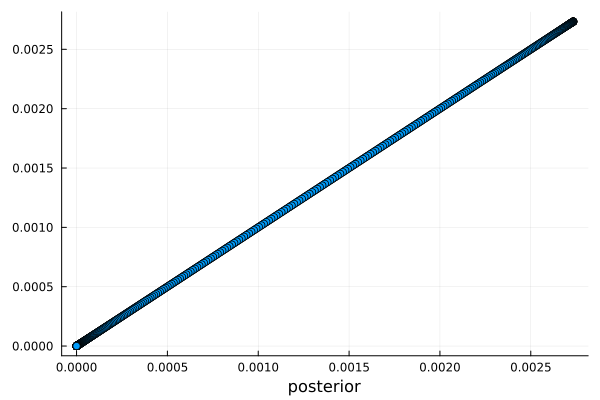

In [137]:
scatter(posterior, cat_var.p, xaxis="posterior")

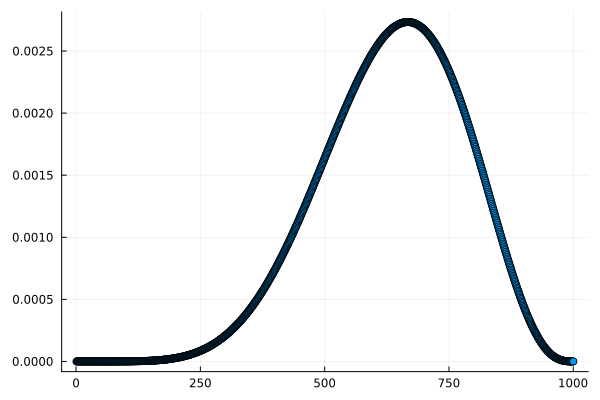

In [138]:
scatter(cat_var.support, cat_var.p)

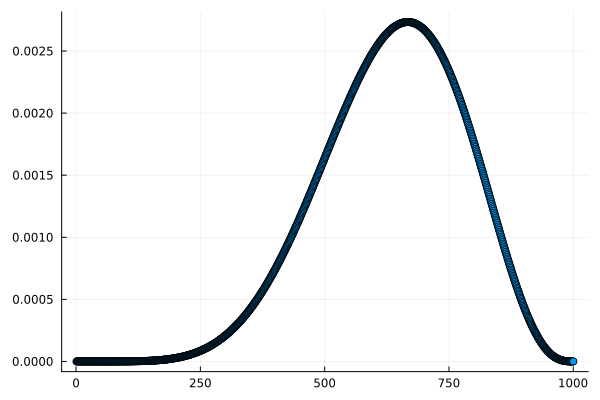

In [139]:
scatter(cat_var.support, posterior)

In [140]:
ncategories(cat_var)

1000

# Code 3.4

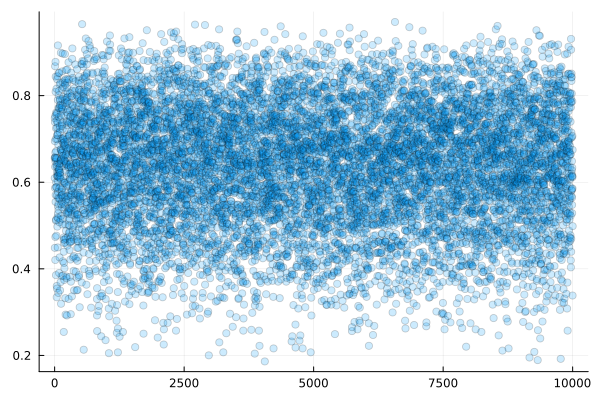

In [88]:
scatter(samples; alpha=0.2)

# Code 3.5

In [89]:
?density

search: density density! KernelDensity DimensionMismatch



```
density(x)
density!(x)
```

Make a line plot of a kernel density estimate of x. The smoothness of the density plot is defined from `bandwidth` (real positive number).

# Arguments

  * `x`: AbstractVector of samples for probability density estimation

# Keyword arguments

  * `trim`::Bool: enables cutting off the distribution tails.
  * `bandwidth`::Number: a low bandwidth induces under-smoothing, whilst a high bandwidth induces over-smoothing.

# Examples

```julia-repl
julia> density(randn(100), bandwidth = -0.01, trim = false)
output : ERROR: Bandwidth must be positive

julia> density(randn(100), bandwidth = 0.1, trim = false)  # a curve with extremity and under-smoothing
julia> density(randn(100), bandwidth = 10, trim = true)  # a curve without extremity and over-smoothing
```

# Example

```julia-repl
julia> using StatsPlots
julia> density(randn(100_000))
```


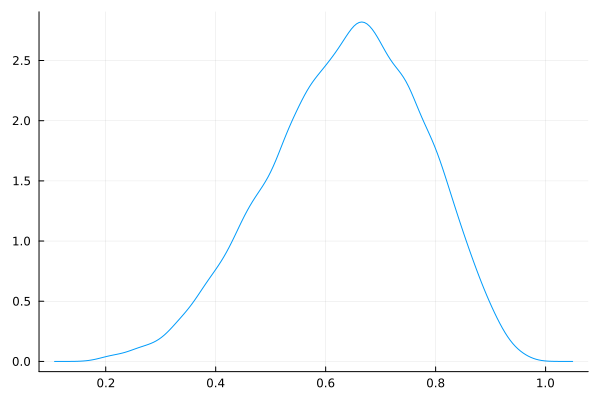

In [143]:
StatsPlots.density(samples)

# Code 3.6

In [91]:
sum(posterior[p_grid .< 0.5])

0.17187458902022873

In [92]:
p_grid .< 0.5

1000-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

# Code 3.7

In [93]:
sum(samples .< 0.5) / samples_count

0.1719

In [94]:
samples .< 0.5

10000-element BitVector:
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 1

# Code 3.8

In [95]:
sum(@. (samples > 0.5) & (samples < 0.75)) / samples_count

0.605

In [96]:
sum((samples .> 0.5) .& (samples .< 0.75))/ samples_count

0.605

In [97]:
?@.

```
@. expr
```

Convert every function call or operator in `expr` into a "dot call" (e.g. convert `f(x)` to `f.(x)`), and convert every assignment in `expr` to a "dot assignment" (e.g. convert `+=` to `.+=`).

If you want to *avoid* adding dots for selected function calls in `expr`, splice those function calls in with `$`.  For example, `@. sqrt(abs($sort(x)))` is equivalent to `sqrt.(abs.(sort(x)))` (no dot for `sort`).

(`@.` is equivalent to a call to `@__dot__`.)

# Examples

```jldoctest
julia> x = 1.0:3.0; y = similar(x);

julia> @. y = x + 3 * sin(x)
3-element Vector{Float64}:
 3.5244129544236893
 4.727892280477045
 3.4233600241796016
```


# Code 3.9

In [98]:
quantile(samples, 0.8)

0.7597597597597597

# Code 3.10

In [99]:
quantile(samples, [0.1, 0.9])

2-element Vector{Float64}:
 0.44844844844844844
 0.8118118118118118

# Code 3.11

In [100]:
p_grid, posterior_3_3, samples_3_3 = construct_posterior_and_sampling(Int32(3), Int32(3))


p_grid = range(0, 1; length = size) = 0.0:0.001001001001001001:1.0


(0.0:0.001001001001001001:1.0, [0.0, 4.008012016020023e-12, 3.206409612816013e-11, 1.0821632443254061e-10, 2.5651276902528155e-10, 5.010015020025025e-10, 8.657305954603251e-10, 1.3747481214948658e-9, 2.0521021522022495e-9, 2.921840759678597e-9  …  0.0038889700511322133, 0.0039007667166666166, 0.003912587213840468, 0.003924431566701838, 0.003936299799298799, 0.003948191935679423, 0.003960107999891784, 0.003972048015983953, 0.0039840120080040006, 0.0039959999999999996], [0.5515515515515516, 0.997997997997998, 0.7517517517517518, 0.7877877877877878, 0.8758758758758759, 0.47347347347347346, 0.5475475475475475, 0.8568568568568569, 0.6806806806806807, 0.973973973973974  …  0.8888888888888888, 0.8898898898898899, 0.8608608608608609, 0.9079079079079079, 0.7557557557557557, 0.933933933933934, 0.6686686686686687, 0.8718718718718719, 0.97997997997998, 0.6386386386386387])

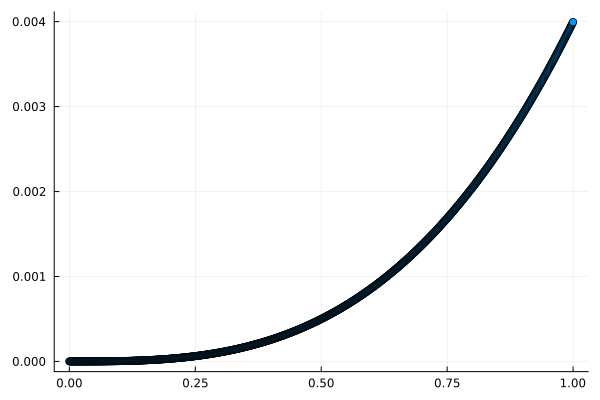

In [101]:
scatter(p_grid, posterior_3_3)

# Code 3.12

In [102]:
percentile(samples_3_3, [25, 75])

2-element Vector{Float64}:
 0.7077077077077077
 0.9309309309309309

# Code 3.13

In [103]:
hpdi(samples_3_3, alpha=0.5)

2-element Vector{Float64}:
 0.8428428428428428
 1.0

In [104]:
?hpdi

search: hpdi HPD chisqpdf nchisqpdf hyperpdf hypercdf MatrixReshaped hyperccdf



# hpdi

Compute high density region.

```julia
hpdi(x; alpha)

```

Derived from `hpd` in MCMCChains.jl.

By default alpha=0.11 for a 2-sided tail area of p < 0.055% and p > 0.945%.


In [105]:
parentmodule(hpdi)

StatisticalRethinking

# Code 3.14

In [106]:
p_grid[argmax(posterior_3_3)]

1.0

In [107]:
argmax(posterior_3_3)

1000

# Code 3.15

In [108]:
?kde

search: kde kde_lscv @kwdef isblockdev InterpKDE BivariateKDE UnivariateKDE



No documentation found.

`KernelDensity.kde` is a `Function`.

```
# 9 methods for generic function "kde" from KernelDensity:
 [1] kde(data::AbstractVector{<:Real}; bandwidth, kernel, npoints, boundary, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:169
 [2] kde(data::AbstractVector{<:Real}, dist::UnivariateDistribution; boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:155
 [3] kde(data::AbstractVector{<:Real}, midpoints::R; bandwidth, kernel, weights) where R<:AbstractRange
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:162
 [4] kde(data::AbstractVector{<:Real}, weights::Union{KernelDensity.UniformWeights, AbstractVector{<:Real}}, midpoints::R, dist::UnivariateDistribution) where R<:AbstractRange
     @ ~/.julia/packages/KernelDensity/wRVC2/src/univariate.jl:150
 [5] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}; bandwidth, kernel, boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:134
 [6] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, weights::Union{KernelDensity.UniformWeights, AbstractVector{<:Real}}, midpoints::Tuple{Rx, Ry}, dist::Union{Tuple{UnivariateDistribution, UnivariateDistribution}, MultivariateDistribution}) where {Rx<:AbstractRange, Ry<:AbstractRange}
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:108
 [7] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, dist::Union{Tuple{UnivariateDistribution, UnivariateDistribution}, MultivariateDistribution}; boundary, npoints, weights)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:114
 [8] kde(data::Tuple{AbstractVector{<:Real}, AbstractVector{<:Real}}, midpoints::Tuple{Rx, Ry}; bandwidth, kernel, weights) where {Rx<:AbstractRange, Ry<:AbstractRange}
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:126
 [9] kde(data::AbstractMatrix{<:Real}, args...; kwargs...)
     @ ~/.julia/packages/KernelDensity/wRVC2/src/bivariate.jl:150
```


In [109]:
k = kde(samples_3_3, bandwidth=0.01)
k.x[argmax(k.density)]

0.979852857253932

In [110]:
k

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(0.04708708708708708:0.000485057602790871:1.04, [0.00012367918565397984, 0.00010116338554772009, 8.277257489092138e-5, 6.78266807172534e-5, 5.575727300788369e-5, 4.609151029910663e-5, 3.843827093930052e-5, 3.2476222962096735e-5, 2.794360647179195e-5, 2.4629522706209883e-5  …  0.0008515621669508977, 0.000708504435511504, 0.0005882042470667648, 0.0004872842935515244, 0.00040282810953460105, 0.0003323244070754412, 0.00027361702082535563, 0.00022486008432923837, 0.00018447805401900982, 0.0001511301994396412])

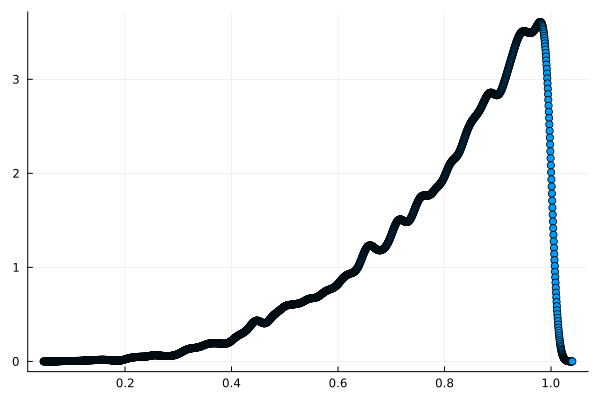

In [111]:
scatter(k.x, k.density)

# Code 3.16
Why not report the posterior mean or median?

In [112]:
mean(samples_3_3), median(samples_3_3)

(0.800722022022022, 0.8428428428428428)

# Code 3.17

Calculating expected loss for any given decision means using the posterior to average over our uncertainty in the true value. Of course we don’t know the true value, in most cases. But if we are going to use our model’s information about the parameter, that means using the entire posterior distribution. So suppose we decide p = 0.5 will be our decision. Then the expected loss will be:

The symbols posterior and p_grid are the same ones we’ve been using throughout this chapter, containing the posterior probabilities and the parameter values, respectively. All the code above does is compute the weighted average loss, where each loss is weighted by its corresponding posterior probability.

In [113]:
sum(@. posterior_3_3 * abs(0.5 - p_grid))

0.3128751874998122

In [114]:
# $ in front of median is to disable broadcast for median.
sum(@. posterior_3_3 * abs($median(samples_3_3) - p_grid))

0.1273515343140828

# Code 3.18 trick for repeating this calculation for every possible decision, using R function sapply() , Julia function map().

In [115]:
loss = map(d -> sum(@. posterior_3_3 * abs(d - p_grid)), p_grid);

# Code 3.19
Now the symbol loss contains a list of loss values, one for each possible decision, corresponding the values in p_grid. From here, it’s easy to find the parameter value that minimizes the loss:

In [116]:
median(samples_3_3)

0.8428428428428428

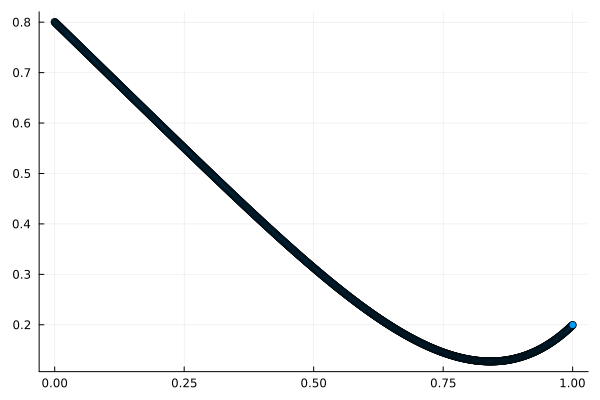

In [117]:
scatter(p_grid, loss)

In [118]:
p_grid[argmin(loss)]

0.8408408408408409

# Code 3.20

In [119]:
[pdf(Binomial(2, 0.7), x) for x ∈ 0:2]

3-element Vector{Float64}:
 0.09000000000000001
 0.41999999999999993
 0.4899999999999998

# Code 3.21

In [120]:
rand(Binomial(2, 0.7))

2

# Code 3.22

In [121]:
s = rand(Binomial(2, 0.7), 10)
println(s)

[1, 0, 2, 1, 1, 1, 2, 1, 2, 2]


# Code 3.23

In [122]:
dummy_w = rand(Binomial(2, 0.7), 100_000);
proportions(dummy_w)  # or counts(dummy_w)/100000

3-element Vector{Float64}:
 0.08871000000000001
 0.41998
 0.49131

In [123]:
counts(dummy_w)

3-element Vector{Int64}:
  8871
 41998
 49131

In [124]:
?counts

search: counts addcounts! codeunits countlines count_ones ncodeunits count_zeros



```
counts(x, [wv::AbstractWeights])
counts(x, levels::UnitRange{<:Integer}, [wv::AbstractWeights])
counts(x, k::Integer, [wv::AbstractWeights])
```

Count the number of times each value in `x` occurs. If `levels` is provided, only values falling in that range will be considered (the others will be ignored without raising an error or a warning). If an integer `k` is provided, only values in the range `1:k` will be considered.

If a vector of weights `wv` is provided, the proportion of weights is computed rather than the proportion of raw counts.

The output is a vector of length `length(levels)`.


# Code 3.24

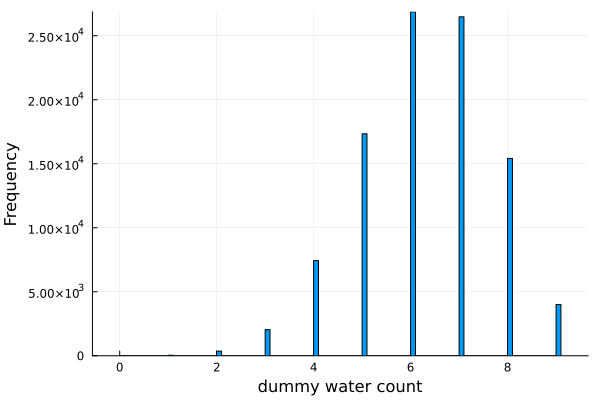

In [125]:
dummy_w = rand(Binomial(9, 0.7), 100_000);
histogram(dummy_w; xlabel="dummy water count", ylabel="Frequency")

# Code 3.25
To simulate predicted observations for a single value of p, say p = 0.6, you can use rbinom to generate random binomial samples.

This generates 10,000 (1e4) simulated predictions of 9 globe tosses (size=9), assuming p =0.6. The predictions are stored as counts of water, so the theoretical minimum is zero and the theoretical maximum is nine. You can use simplehist(w) (in the rethinking package) to get a clean histogram of your simulated outcomes.

In [126]:
w = rand(Binomial(9, 0.7), 10_000);

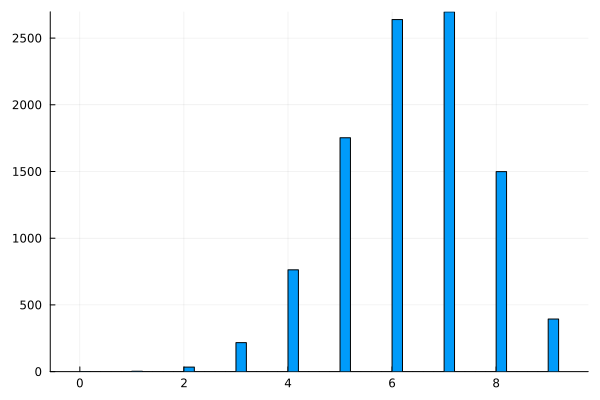

In [127]:
histogram(w)

In [128]:
@show (mean(w), median(w))

(mean(w), median(w)) = (6.279, 6.0)


(6.279, 6.0)

# Code 3.26
All you need to propagate parameter uncertainty into these predictions is replace thevalue 0.6 with samples from the posterior.

In [129]:
w = [rand(Binomial(9, p)) for p in samples];
length(samples)

10000

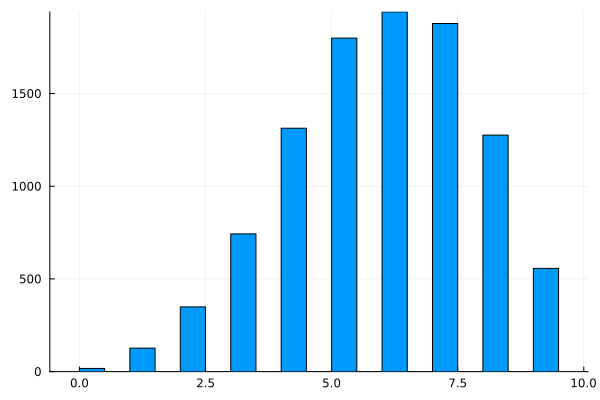

In [130]:
histogram(w) 

In [131]:
@show (mean(w), median(w))

(mean(w), median(w)) = (5.7314, 6.0)


(5.7314, 6.0)

In [132]:
percentile(w, [25, 75])

2-element Vector{Float64}:
 4.0
 7.0

In [133]:
hpdi(w, alpha=0.5)

2-element Vector{Int64}:
 4
 6